In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [49]:
data = pd.read_csv("C:/Users/Ayush Gupta/Desktop/Semester 6/ML/ML_Practicals/Housing_dataset_Multiple_LR.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
data_new =data.drop(["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"],axis=1)
data_new.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [51]:
# find correlation between values and target variable price
data_new.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [52]:
# Scale the data using MinMaxScaler
data_new = data_new.drop(["bedrooms","stories","parking"],axis=1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_new)
data_scaled = pd.DataFrame(data_scaled, columns=data_new.columns)

In [53]:
X = data_scaled.drop('price', axis=1)
y = data_scaled['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Create the linear regression model with the training set
# Make predictions using the test set.
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [55]:
# Find the coefficient and slope of the fitted regression line
print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)
print('R^2: ', model.score(X_test, y_test))

Coefficient:  [0.48033619 0.42461946]
Intercept:  0.1088330737698055
R^2:  0.4235252099711745


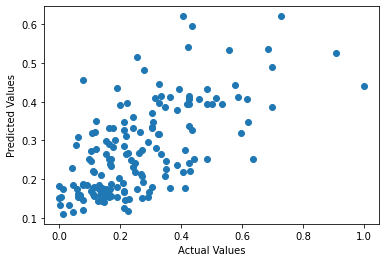

In [58]:
# Compare the actual and predicted values by plotting a scatter graph
plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()